# 6. Transfer functions

In [2]:
%run pykat_notebook_defaults.py
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 0.8.3           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat

Imported matplotlib.pyplot as plt
Imported numpy as np


You can now use 'show_finesse(kat)' to display the Finesse code of a 'kat' object


<img src="tf_simple.svg" width=400 height=400/>

<font size="2">**Figure.** The rectangle symbolises a "black box"-system that in the frequency domain is characterised by the transfer function $H(\omega)$. The signal $Y(\omega)$ is what this black box returns if we give it $X(\omega)$.</font>

A transfer function $H(\omega)$ describes the linear relation between an input signal $X(\omega)$ and an output signal $Y(\omega)$ of a system in the frequency domain: 

\begin{align}
Y(\omega) = H(\omega) X(\omega)
\end{align}

As an example, for the moving mirror case, the system consists of a carrier field that is perfectly reflected by a mirror, and a measurement made by a photo diode at the reference plane. In the time domain our input signal is the mirror motion $x(t)$, and the output signal is the power measured by the photo diode $y(t)$. To get to the frequency domain we can Fourier transform (assuming steady state, otherwise Laplace transform is needed) the input and the output signals to get $X(\omega) = \mathcal{F}\big(x(t)\big)$ and $Y(\omega)=\mathcal{F}\big(y(t)\big)$. The output $Y(\omega)$ is proportional to the amplitude of the beat signal, and the input $X(\omega)$ is proportional to the mirror motion amplitude. The transfer function tells us how strong beat signal we get per unit mirror motion amplitude, as well as relative phase between the input and output. To find a transfer function in an experiment a network analyser would be used to measure the amplitude and phase of the output relative to the input. Transfer functions are usually presented as Bode diagrams, which will be shown in the example below.

### Finesse example: Transfer function - power noise $\to$ photodiode
In this example we compute how laser power noise couples into a photodiode. We create the power noise by amplitude modulating the laser field using the command `fsig`, and compute the transfer function by demodulating the photodiode power signal using `pd1`.

In [3]:
kat = finesse.kat()          # Initialising Finesse
kat.verbose = False          # Tells Finesse to talk less

code = '''
l laser 2 0 n0            # Laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1              # Space from laser to mirror (1 m)
fsig sig1 laser amp 1 0   # Laser power fluctuations (freq 1 Hz, phase 0)
# Detectors
pd DC n1
pd1 tf 1 n1

xaxis sig1 f log 10k 1G 1000
yaxis log abs:deg
put tf f $x1
'''
kat.parseCommands(code)                                  # passing the input text to the Finesse object
out = kat.run()

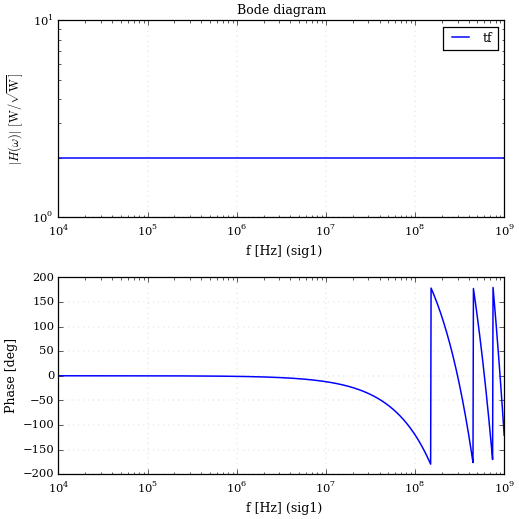

In [4]:
fig = out.plot(title='Bode diagram',
               ylabel='$|H(\omega)|$ $[\mathrm{W}/\sqrt{\mathrm{W}}]$',
               detectors=["tf"])

<font size="2">**Figure.** The upper part of the Bode diagram is called the frequency response. It shows how the amplitude of the input signal couples into the output signal. Here, it is independent on the frequency. The lower part of a Bode diagram is called the phase response, meaning the phase shift of the output compared to the input. </font>

We can see in the figure above than an amplitude fluctuation of 1 $\sqrt{\mathrm{W}}$ on a 2 W laser would create a beat signal of 2 W. The frequency response would actaully always be equal to the laser power for this system. The phase response dependens on the frequency since the phase of the beat signal varies quicker with increased frequency. The phase response also depends on the length between the laser and the photo diode. 

You can test the statements above by changing the laser power and the length of the space. 